In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pylab import rcParams
from sklearn import preprocessing

import scipy
from scipy.stats.stats import pearsonr

In [2]:
%matplotlib inline
pylab.rcParams[ 'figure.figsize' ] = 5 , 4
sns.set_style('whitegrid')

In [3]:
Transit_Reviews=pd.read_csv("transitfinal_100m.csv", usecols=['Hotel_Name','transit_count','Review_Count'])
Transit_Reviews = Transit_Reviews.drop_duplicates()
Transit_Reviews.index = pd.RangeIndex(start=0, stop=len(Transit_Reviews), step=1)
Transit_Reviews.to_csv('transitfinal_100m.csv')
Transit=pd.read_csv("transitfinal_100m.csv", usecols=['Hotel_Name','transit_count','Review_Count'])



In [4]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews-2.csv",usecols=['Hotel_Name','Reviewer_Score'])
Hotel_Reviews.head()

,Hotel_Name,Reviewer_Score
0,Hotel Arena,2.9
1,Hotel Arena,7.5
2,Hotel Arena,7.1
3,Hotel Arena,3.8
4,Hotel Arena,6.7


In [5]:
Hotel_name=np.array([])
mean_reviewer_score=np.array([])

In [6]:
Hotels=Hotel_Reviews.Hotel_Name.unique()

In [7]:
for Hotel in Hotels:
    TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name']==Hotel]
    TEMP=TEMP.reset_index()
    Hotel_name=np.append(Hotel_name,Hotel)
    
    mean_reviewer_score=np.append(mean_reviewer_score, TEMP['Reviewer_Score'].mean())

In [8]:
column1=['Hotel_name','mean_reviewer_score']

In [9]:
data1=np.column_stack((Hotel_name, mean_reviewer_score))

In [10]:
HotelReviews=pd.DataFrame(data1, columns=column1)
HotelReviews['mean_reviewer_score']=pd.to_numeric(HotelReviews['mean_reviewer_score'])
HotelReviews=HotelReviews[['mean_reviewer_score']]
HotelReviews.head()

,mean_reviewer_score
0,7.836296
1,8.602827
2,9.298843
3,7.711469
4,8.848571


In [11]:
Connections=pd.concat([Transit_Reviews, HotelReviews], ignore_index=False, axis=1)
Connect = Connections[Connections.transit_count!='-']

Connect['transit_count']=Connect['transit_count'].astype(str).astype(int)
Connect

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Hotel_Name,transit_count,Review_Count,mean_reviewer_score
0,Hotel Arena,0,405.0,7.836296
1,K K Hotel George,1,566.0,8.602827
2,Apex Temple Court Hotel,2,1037.0,9.298843
3,The Park Grand London Paddington,0,1770.0,7.711469
4,Monhotel Lounge SPA,0,35.0,8.848571
5,Kube Hotel Ice Bar,2,19.0,5.852632
6,The Principal London,2,1425.0,8.029333
7,Park Plaza County Hall London,2,2223.0,8.369546
8,One Aldwych,3,136.0,9.144853
9,Splendid Etoile,8,127.0,9.142520


In [12]:
TransitGroups=Connect.transit_count.unique()

In [13]:
TransitGroups.size

17

In [14]:
Connect['transit_count'].value_counts().sort_values(ascending=False)

0     562
1     341
2     185
3     157
4     101
5      47
6      28
8      20
7      18
10      6
9       4
14      2
17      2
16      1
18      1
13      1
19      1
Name: transit_count, dtype: int64

In [15]:
bins = [-1, 0, 2, 4, 6, 8, 20]
groups=Connect.groupby(['transit_count',pd.cut(Connect.transit_count, bins)])
Transits = groups.size().unstack().sum()
Transits

transit_count
(-1, 0]    562.0
(0, 2]     526.0
(2, 4]     258.0
(4, 6]      75.0
(6, 8]      38.0
(8, 20]     18.0
dtype: float64

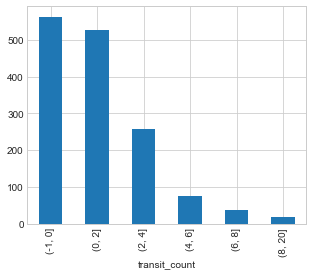

In [16]:
Transits.plot('bar')
plt.show()

In [17]:
Con1 = Connect[Connect.transit_count==0].mean_reviewer_score.mean()
Con1

8.492160449427232

In [18]:
Con2 = Connect[(Connect['transit_count']>0) & (Connect['transit_count']<5)].mean_reviewer_score.mean()
Con2

8.451592721307414

In [19]:
Con3 = Connect[(Connect['transit_count']>4) & (Connect['transit_count']<7)].mean_reviewer_score.mean()
Con3

8.322563808278558

In [20]:
Con4 = Connect[(Connect['transit_count']>6) & (Connect['transit_count']<9)].mean_reviewer_score.mean()
Con4

8.64493288907558

In [21]:
Con5 = Connect[(Connect['transit_count']>8) & (Connect['transit_count']<11)].mean_reviewer_score.mean()
Con5

8.928118227884898

In [22]:
Con6 = Connect[(Connect['transit_count']>10) & (Connect['transit_count']<13)].mean_reviewer_score.mean()
Con6

nan

In [23]:
Con7 = Connect[(Connect['transit_count']>12) & (Connect['transit_count']<15)].mean_reviewer_score.mean()
Con7

8.125826376666158

In [24]:
Con8 = Connect[(Connect['transit_count']>14) & (Connect['transit_count']<17)].mean_reviewer_score.mean()
Con8

8.271559633027525

In [25]:
Con9 = Connect[(Connect['transit_count']>16) & (Connect['transit_count']<19)].mean_reviewer_score.mean()
Con9

8.578075048732941

In [26]:
Con10 = Connect[(Connect['transit_count']>18) & (Connect['transit_count']<21)].mean_reviewer_score.mean()
Con10

8.642391304347827

In [27]:
Hotel_City_Reviews=pd.read_csv("Hotel_Info_Country_City.csv", usecols=['Hotel_Name','City'])

In [28]:
Paris=Hotel_City_Reviews.loc[Hotel_City_Reviews['City']=='Paris']
len(Paris.Hotel_Name.unique())

458

In [29]:
hotels_zero_transit=pd.DataFrame(Connect[Connect.transit_count==0].Hotel_Name)


In [30]:
Hotel_Paris = hotels_zero_transit[hotels_zero_transit['Hotel_Name'].isin(Paris.Hotel_Name.unique())]
Hotel_Paris

,Hotel_Name
4,Monhotel Lounge SPA
10,Hotel Trianon Rive Gauche
12,Novotel Suites Paris Nord 18 me
16,Select Hotel
17,H tel De Vend me
26,H tel Juliana Paris
34,Hotel Le 10 BIS
42,Le Metropolitan a Tribute Portfolio Hotel
43,Atala Champs Elys es
52,Hotel des Tuileries Relais du Silence


In [31]:
import langid
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LiverJoker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews-2.csv")
TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name'].isin(Hotel_Paris.Hotel_Name.unique())]
len(TEMP)

22180

In [33]:
corpusP= []
corpusN= []
uniqueUsefulTokens= set()

for i in TEMP.index:
       reviewP=""
       reviewN="" 
       if ("No Negative" in TEMP['Negative_Review'][i]) and "No Positive" in TEMP['Positive_Review'][i]:
            continue
       elif "No Negative" in TEMP['Negative_Review'][i]:
            reviewP = TEMP['Positive_Review'][i]
       else:
            reviewN = TEMP['Negative_Review'][i]
       
       if (langid.classify(reviewP)[0]!='en' and langid.classify(reviewN)[0]!='en'):
            continue
       reviewP= re.sub('[^a-zA-Z]', ' ', reviewP)
       reviewN= re.sub('[^a-zA-Z]', ' ', reviewN)

       reviewP=reviewP.lower().split()
       reviewN=reviewN.lower().split()

       ps=PorterStemmer()
       reviewP  = [ps.stem(word) for word in reviewP if not word in set(stopwords.words('english'))]
       reviewN  = [ps.stem(word) for word in reviewN if not word in set(stopwords.words('english'))]
       for word in reviewP:
            uniqueUsefulTokens.add(word)
       reviewP = ' '.join(reviewP)
    
       for word in reviewN:
            uniqueUsefulTokens.add(word)
       reviewN = ' '.join(reviewN)
    
       if reviewP!="":
            corpusP.append(reviewP)
        
    
       if reviewN!="":
            corpusN.append(reviewN)
            

In [34]:
len(corpusN)

15803

In [35]:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

def computeIDF(docList):
    import math
    ifdDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(),0)
    for doc in docList:
        for word, val in doc.items():
            if val>0:
                idfDict[word] +=1
            
    for word, val in idfDict.items():
        idfDict[word] = math.log(N/float(val))
        
    return idfDict

def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [36]:
from functools import reduce

In [37]:
bowA = []
for line in corpusN:
    line= re.sub('[^a-zA-Z]', ' ', line)
    bowA.append(line.split(" "))

bowAnew = reduce(lambda x,y: x+y,bowA)
len(bowA)

15803

In [38]:
wordSet=set(bowAnew)
wordSet

{'dishwash',
 'flimsi',
 'backsplash',
 'loo',
 'understat',
 'horn',
 'dvd',
 'million',
 'hall',
 'sercur',
 'shirti',
 'deceiv',
 'cruiser',
 'irrelev',
 'gotten',
 'micro',
 'refurbsih',
 'ooppp',
 'slightest',
 'categoris',
 'childhood',
 'quickest',
 'sytem',
 'centimet',
 'classic',
 'fast',
 'whatsapp',
 'vast',
 'lotion',
 'hame',
 'jacqu',
 'unrealist',
 'held',
 'drinker',
 'concerg',
 'ignor',
 'complet',
 'sugari',
 'western',
 'tooth',
 'guilti',
 'enregistr',
 'deni',
 'nop',
 'ymca',
 'usd',
 'obviou',
 'islet',
 'fray',
 'sentenc',
 'marai',
 'terrifi',
 'presum',
 'provid',
 'slot',
 'presenc',
 'coach',
 'interrupt',
 'safebox',
 'au',
 'tooooo',
 'facewash',
 'faculti',
 'ooh',
 'extens',
 'crew',
 'variou',
 'outsourc',
 'goin',
 'accomplish',
 'suck',
 'serciv',
 'dodgi',
 'ofcours',
 'cm',
 'furiou',
 'bijou',
 'brexit',
 'superk',
 'foe',
 'sweep',
 'wiff',
 'bedcov',
 'expedit',
 'dinner',
 'shed',
 'arch',
 'rooom',
 'rack',
 'cub',
 'protein',
 'recogn',
 'ju

In [39]:
wordDictAarr = np.array([])
for listbowA in bowA:
    wordDictA = dict.fromkeys(wordSet,0)
    for word in listbowA:
        wordDictA[word]+=1
    wordDictAarr = np.append(wordDictAarr, wordDictA)

In [40]:
i = 0
tfBowAarr = np.array([])
for listbowA in bowA:
    tfBowA = computeTF(wordDictAarr[i], listbowA)
    i +=1
    tfBowAarr = np.append(tfBowAarr, tfBowA)
tfBowAarr

array([ {'dishwash': 0.0, 'flimsi': 0.0, 'backsplash': 0.0, 'loo': 0.0, 'understat': 0.0, 'horn': 0.0, 'dvd': 0.0, 'million': 0.0, 'hall': 0.0, 'sercur': 0.0, 'shirti': 0.0, 'deceiv': 0.0, 'cruiser': 0.0, 'irrelev': 0.0, 'gotten': 0.0, 'micro': 0.0, 'refurbsih': 0.0, 'ooppp': 0.0, 'slightest': 0.0, 'categoris': 0.0, 'childhood': 0.0, 'quickest': 0.0, 'sytem': 0.0, 'centimet': 0.0, 'classic': 0.0, 'fast': 0.0, 'whatsapp': 0.0, 'vast': 0.0, 'lotion': 0.0, 'hame': 0.0, 'jacqu': 0.0, 'unrealist': 0.0, 'held': 0.0, 'drinker': 0.0, 'concerg': 0.0, 'ignor': 0.0, 'complet': 0.0, 'sugari': 0.0, 'western': 0.0, 'tooth': 0.0, 'guilti': 0.0, 'enregistr': 0.0, 'deni': 0.0, 'nop': 0.0, 'ymca': 0.0, 'usd': 0.0, 'obviou': 0.0, 'islet': 0.0, 'fray': 0.0, 'sentenc': 0.0, 'marai': 0.0, 'terrifi': 0.0, 'presum': 0.0, 'provid': 0.0, 'slot': 0.0, 'presenc': 0.0, 'coach': 0.0, 'interrupt': 0.0, 'safebox': 0.0, 'au': 0.0, 'tooooo': 0.0, 'facewash': 0.0, 'faculti': 0.0, 'ooh': 0.0, 'extens': 0.0, 'crew': 0.0, 

In [41]:
idfs = computeIDF(wordDictAarr)
idfsData = pd.DataFrame.from_dict(idfs, orient='index', dtype=float)
idfsData[0]=1/idfsData[0]

PosRev = pd.DataFrame(idfsData[0].sort_values(ascending=False))
PositiveReviews = PosRev.iloc[0:10, :]
PositiveReviews

,0
room,1.008534
small,0.548214
hotel,0.536214
breakfast,0.520619
noth,0.449700
staff,0.395151
bit,0.372941
could,0.371267
bathroom,0.367904
would,0.358206
